# T2.1 - MODELOS DE REGRESSÃO LINEAR

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

Utilizando o dataset1.csv em anexo, criem alguns modelos de regressão linear (variando as features) para tentar prever a variável target. Avaliem cada modelo individualmente e, ao final, façam uma análise comparativa dos modelos, discutam os resultados e escolham e justifiquem qual foi o melhor modelo obtido.

## SETUP

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import operator
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import random

# Seed

In [2]:
seed = 1289302
random.seed(seed)

## Dataset

In [3]:
dataset1 = pd.read_csv('dataset1.csv')

In [4]:
dataset1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,target
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98,24.0
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14,21.6
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03,34.7
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94,33.4
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33,36.2
5,0.0,0,6.430,6.0622,222,394.12,0.02985,2.18,0.458,58.7,3,18.7,5.21,28.7
6,12.5,0,6.012,5.5605,311,395.60,0.08829,7.87,0.524,66.6,5,15.2,12.43,22.9
7,12.5,0,6.172,5.9505,311,396.90,0.14455,7.87,0.524,96.1,5,15.2,19.15,27.1
8,12.5,0,5.631,6.0821,311,386.63,0.21124,7.87,0.524,100.0,5,15.2,29.93,16.5
9,12.5,0,6.004,6.5921,311,386.71,0.17004,7.87,0.524,85.9,5,15.2,17.10,18.9


In [5]:
dataset1.dtypes

V1        float64
V2          int64
V3        float64
V4        float64
V5          int64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11         int64
V12       float64
V13       float64
target    float64
dtype: object

# Analisando dados

In [6]:
y = dataset1['target'].values
X = dataset1.drop('target', axis= 1)

In [7]:
dataset1['target'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

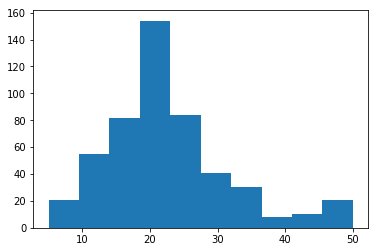

In [8]:
plt.hist(dataset1['target'])
plt.show()

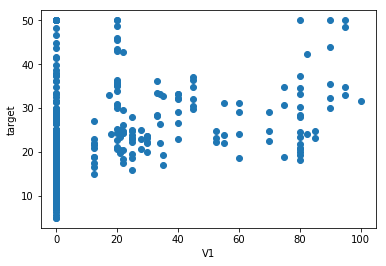

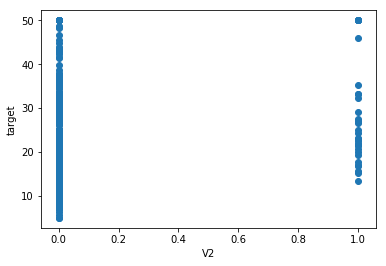

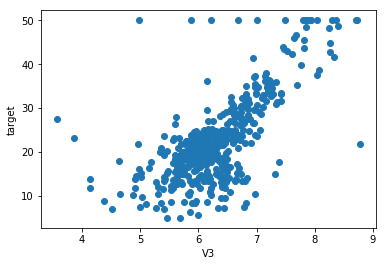

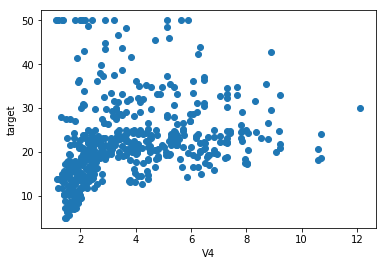

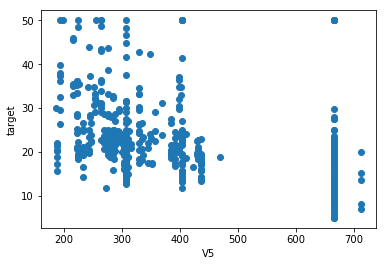

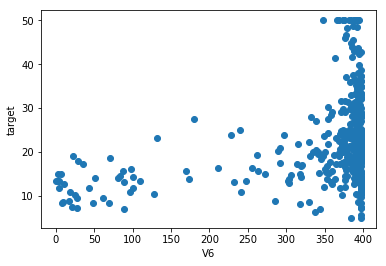

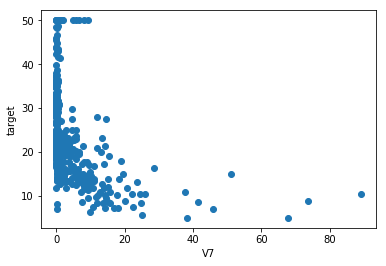

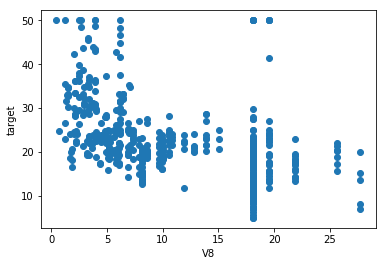

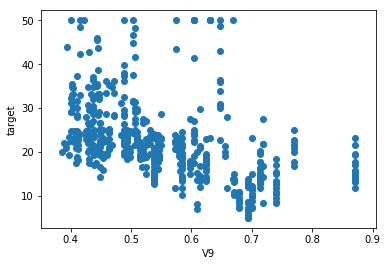

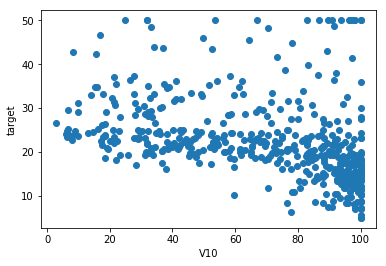

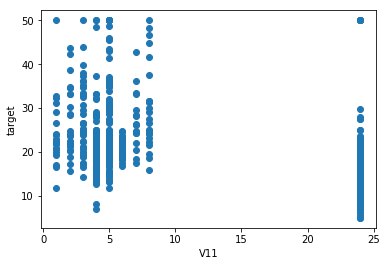

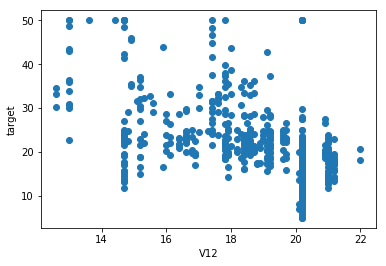

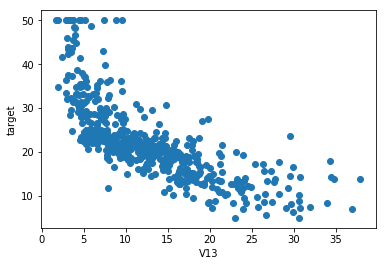

In [9]:
for i in range(1, 14):
    var = 'V' + str(i)
    plt.scatter(X[var], y)
    plt.xlabel(var)
    plt.ylabel("target")
    plt.show()

Os modelos mais promissores parecem: V3, V9, V10, V13 olhando de forma bem crua

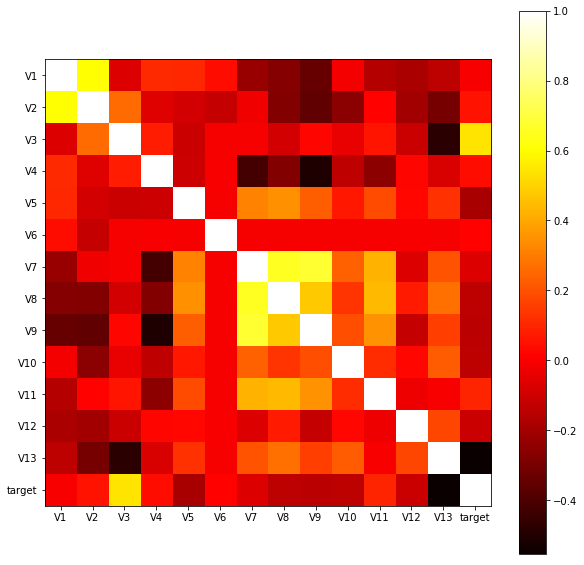

In [10]:
datasetpct = dataset1[:].pct_change()  
corr = datasetpct.corr()  
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns)
plt.show()  

Podemos ver que quanto mais perto das extremidades da escala (mais proximos de preto ou de branco) mais existe correlação entre as variáveis 

Parecia promissor o grafico de correlações porém não consegui extrair informações muito relevantes, portanto a seguir tento examinar as correlações com target

In [11]:
corrsorted = corr.copy()
corrsorted = corrsorted.assign( sor = abs( corrsorted['target'] ) )
corrsorted = corrsorted.sort_values(by=['sor'])
corrsorted['target']

V1        0.002497
V6        0.019641
V4        0.045765
V2        0.052716
V7       -0.067060
V11       0.098149
V12      -0.108125
V8       -0.136698
V10      -0.140874
V9       -0.147755
V5       -0.185393
V3        0.543897
V13      -0.555005
target    1.000000
Name: target, dtype: float64

V13, V3 parecem ser os que possuem maior correlação com target, enquanto V5 também possui uma correlaçao, mas bem menor comparado aos dois primeiros

## Separando dados de treino e de teste (20% de teste)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=seed)

In [13]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
413,0.0,0,5.155,1.5894,666,210.97,28.65580,18.10,0.597,100.0,24,20.2,20.08
163,0.0,1,8.375,2.1620,403,388.45,1.51902,19.58,0.605,93.9,5,14.7,3.32
420,0.0,0,6.411,1.8589,666,318.75,11.08740,18.10,0.718,100.0,24,20.2,15.02
450,0.0,0,6.749,2.3236,666,0.32,6.71772,18.10,0.713,92.6,24,20.2,17.44
177,0.0,0,6.315,3.3175,296,395.60,0.05425,4.05,0.510,73.4,5,16.6,6.29


In [14]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
147,0.0,0,4.926,1.4608,403,391.71,2.36862,19.58,0.8710,95.7,5,14.7,29.53
424,0.0,0,5.565,2.0635,666,3.65,8.79212,18.10,0.5840,70.6,24,20.2,17.16
93,28.0,0,6.211,3.6659,270,396.33,0.02875,15.04,0.4640,28.9,4,18.2,6.21
332,35.0,0,6.031,6.6407,304,362.25,0.03466,6.06,0.4379,23.3,1,16.9,7.83
164,0.0,0,5.854,2.4220,403,395.11,2.24236,19.58,0.6050,91.8,5,14.7,11.64


# Setando função de previsão

In [15]:
def predict(features):
    # Nome
    if features == "all":
        name = "Todas"
    else:
        name = ""
        for feature in features:
            name = name + " " + feature
    print('Features:', name)
    
    # Variavel alvo
    y_v = y_train
    # Variavel preditora
    if features == "all":
        x_v = X_train
    elif len(features) == 1:
        x_v = X_train[features].values.reshape(-1, 1)
    else:
        x_v = pd.DataFrame()    
        for feature in features:
            x_v[feature] = X_train[feature]

    # Modelo
    reg = LinearRegression()
    reg.fit(x_v, y_v)

    # Score
    score_train = reg.score(x_v, y_v)
    print('Score (R2) encontrada nos dados de treino:', '{:6.4f}'.format(score_train))

    # Coef
    print('Coeficientes:', list(map('{:.4f}'.format,reg.coef_)))
    
    # erros
    if features == "all":
        x_test = X_test
    elif len(features) == 1:
        x_test = X_test[features].values.reshape(-1, 1)
    else:
        x_test = pd.DataFrame()
        for feature in features:
            x_test[feature] = X_test[feature]
        
    erro1 = np.mean((reg.predict(x_test) - y_test) ** 2)
    print('Erro quadrático médio:', erro1)
    
    erro2 = np.mean(abs((reg.predict(x_test) - y_test)))
    print('Erro absoluto médio:', erro2)
   
    erro3 = np.mean(abs(reg.predict(x_test) - y_test) / abs(y_test))
    print('Erro relativo médio:', erro3)

    # variância
    score = reg.score(x_test, y_test)
    print('Variancia:', score)
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(y_test, reg.predict(x_test), color='blue', linewidth=2, zorder=10)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

    plt.show()
    
    # comparativo
    temp = pd.DataFrame([[name, score_train, erro3, erro2, erro1, score]], columns=['features', 'score', 'erro relativo', 'erro absoluto', 'erro quadratico', 'variancia'])
    return temp

# Usando todas as features

In [16]:
comparativo = pd.DataFrame(columns=['features', 'score', 'erro relativo', 'erro absoluto', 'erro quadratico', 'variancia'])

Features: Todas
Score (R2) encontrada nos dados de treino: 0.7621
Coeficientes: ['0.0423', '3.2792', '4.3493', '-1.2616', '-0.0122', '0.0085', '-0.0925', '0.0676', '-16.2273', '0.0033', '0.2739', '-0.9211', '-0.5269']
Erro quadrático médio: 29.9536654877
Erro absoluto médio: 3.57571719499
Erro relativo médio: 0.17032956705
Variancia: 0.642723577647


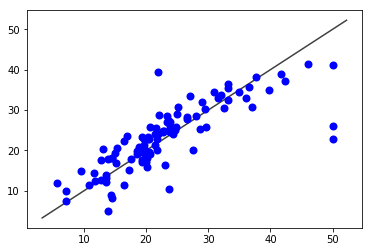

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
0,Todas,0.762089,0.17033,3.575717,29.953665,0.642724


In [17]:
result = predict("all")
comparativo = comparativo.append(result, ignore_index=True)
comparativo.sort_values(by=['score'])

O score foi 0.762 e um erro relativo de 17%, parece bom mas dependendo da aplicação pode ser que seja necessário um erro menor ou um score maior.
O grafico mostra no x a previsão com a base de teste e no y os valores reais, ou seja, quanto mais distante da linha central estiverem os valores mais discrepantes são. Esse grafico foi feito com o intuito de demonstrar de forma visual o erro da previsão.

Sobre os coeficientes: o maior coef é de V9 com 16.22, depois V3 com 4.34, seguido de V2 com 3.27 e V4 com 1.26

# Cada feature

Agora, vou tentar para cada feature isolada

Features:  V1
Score (R2) encontrada nos dados de treino: 0.1342
Coeficientes: ['0.1387']
Erro quadrático médio: 74.9157476124
Erro absoluto médio: 6.19159224357
Erro relativo médio: 0.313025785288
Variancia: 0.106432222934


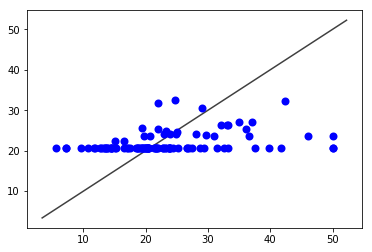

Features:  V2
Score (R2) encontrada nos dados de treino: 0.0337
Coeficientes: ['7.6046']
Erro quadrático médio: 83.113636193
Erro absoluto médio: 6.96486934199
Erro relativo médio: 0.364168974864
Variancia: 0.00865079100459


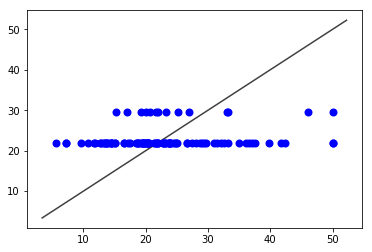

Features:  V3
Score (R2) encontrada nos dados de treino: 0.5251
Coeficientes: ['9.5760']
Erro quadrático médio: 57.9674668981
Erro absoluto médio: 4.69846311531
Erro relativo médio: 0.26244911343
Variancia: 0.308585148128


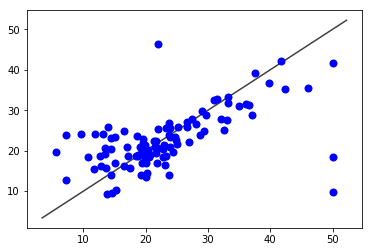

Features:  V4
Score (R2) encontrada nos dados de treino: 0.0719
Coeficientes: ['1.1428']
Erro quadrático médio: 82.2438874148
Erro absoluto médio: 6.49473266026
Erro relativo médio: 0.324298777243
Variancia: 0.0190248379457


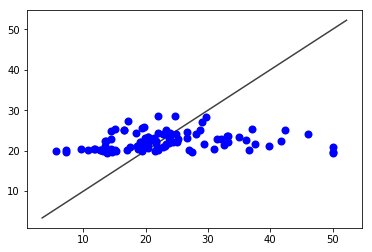

Features:  V5
Score (R2) encontrada nos dados de treino: 0.2408
Coeficientes: ['-0.0267']
Erro quadrático médio: 73.014689043
Erro absoluto médio: 6.19458053316
Erro relativo médio: 0.293659099007
Variancia: 0.12910735779


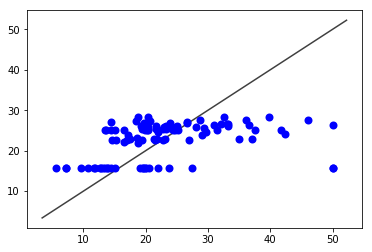

Features:  V6
Score (R2) encontrada nos dados de treino: 0.1127
Coeficientes: ['0.0341']
Erro quadrático médio: 75.4235575211
Erro absoluto médio: 6.23895664712
Erro relativo médio: 0.30895821416
Variancia: 0.100375251125


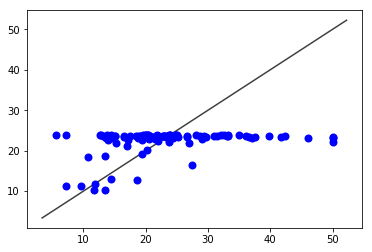

Features:  V7
Score (R2) encontrada nos dados de treino: 0.1511
Coeficientes: ['-0.3852']
Erro quadrático médio: 71.9541135174
Erro absoluto médio: 6.25931708091
Erro relativo médio: 0.305615840195
Variancia: 0.141757516735


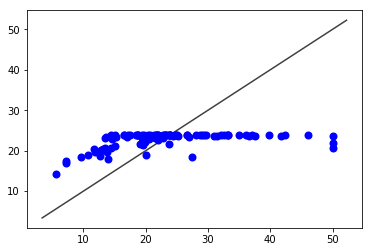

Features:  V8
Score (R2) encontrada nos dados de treino: 0.2383
Coeficientes: ['-0.6452']
Erro quadrático médio: 65.9539532041
Erro absoluto médio: 5.95199854115
Erro relativo médio: 0.299233582915
Variancia: 0.213325245605


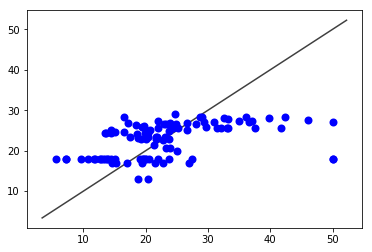

Features:  V9
Score (R2) encontrada nos dados de treino: 0.1914
Coeficientes: ['-34.9081']
Erro quadrático médio: 71.8879836144
Erro absoluto médio: 6.1848041093
Erro relativo médio: 0.300425030081
Variancia: 0.142546290154


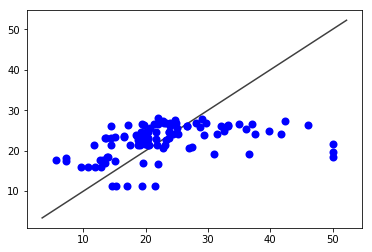

Features:  V10
Score (R2) encontrada nos dados de treino: 0.1483
Coeficientes: ['-0.1257']
Erro quadrático médio: 74.3709310422
Erro absoluto médio: 6.12635138498
Erro relativo médio: 0.29608354197
Variancia: 0.112930596734


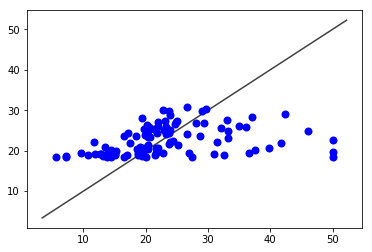

Features:  V11
Score (R2) encontrada nos dados de treino: 0.1607
Coeficientes: ['-0.4228']
Erro quadrático médio: 77.1898657834
Erro absoluto médio: 6.4253604138
Erro relativo médio: 0.304579741834
Variancia: 0.0793073688994


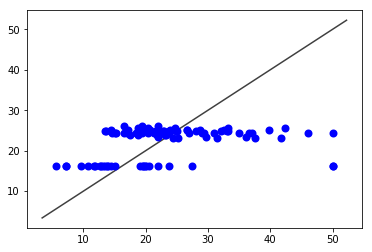

Features:  V12
Score (R2) encontrada nos dados de treino: 0.2810
Coeficientes: ['-2.2405']
Erro quadrático médio: 70.3947182311
Erro absoluto médio: 6.17339313553
Erro relativo médio: 0.315155945733
Variancia: 0.160357416275


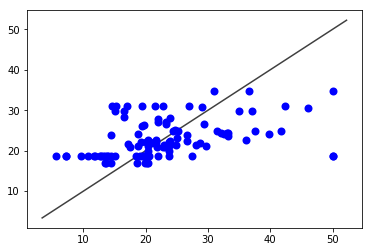

Features:  V13
Score (R2) encontrada nos dados de treino: 0.5637
Coeficientes: ['-0.9830']
Erro quadrático médio: 45.2495839443
Erro absoluto médio: 4.9056486901
Erro relativo médio: 0.22406590169
Variancia: 0.460279428199


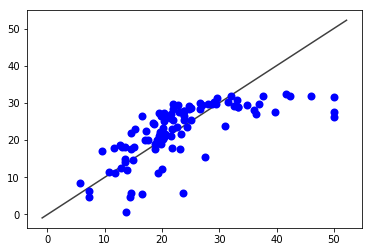

In [18]:
for i in range(1, 14):
    # Feature
    f = "V" + str(i)
    
    result = predict([f])
    comparativo = comparativo.append(result, ignore_index=True)

In [19]:
comparativo.sort_values(by=['score'])

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
2,V2,0.033733,0.364169,6.964869,83.113636,0.008651
4,V4,0.071928,0.324299,6.494733,82.243887,0.019025
6,V6,0.112677,0.308958,6.238957,75.423558,0.100375
1,V1,0.134206,0.313026,6.191592,74.915748,0.106432
10,V10,0.148274,0.296084,6.126351,74.370931,0.112931
7,V7,0.151131,0.305616,6.259317,71.954114,0.141758
11,V11,0.160729,0.304580,6.425360,77.189866,0.079307
9,V9,0.191412,0.300425,6.184804,71.887984,0.142546
8,V8,0.238282,0.299234,5.951999,65.953953,0.213325
5,V5,0.240768,0.293659,6.194581,73.014689,0.129107


Os 3 melhores scores foram de V3 e V13 e V12, portanto, vamos tentar com essas 3 features

# V3 & V13 & V12

Features:  V3 V12 V13
Score (R2) encontrada nos dados de treino: 0.7108
Coeficientes: ['5.0014', '-0.9205', '-0.5600']
Erro quadrático médio: 38.267666032
Erro absoluto médio: 3.97409204332
Erro relativo médio: 0.196270458014
Variancia: 0.543557204465


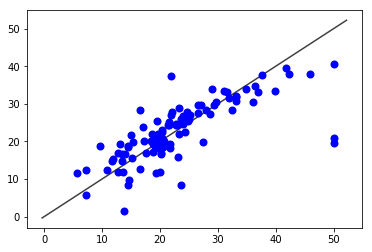

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
2,V2,0.033733,0.364169,6.964869,83.113636,0.008651
4,V4,0.071928,0.324299,6.494733,82.243887,0.019025
6,V6,0.112677,0.308958,6.238957,75.423558,0.100375
1,V1,0.134206,0.313026,6.191592,74.915748,0.106432
10,V10,0.148274,0.296084,6.126351,74.370931,0.112931
7,V7,0.151131,0.305616,6.259317,71.954114,0.141758
11,V11,0.160729,0.304580,6.425360,77.189866,0.079307
9,V9,0.191412,0.300425,6.184804,71.887984,0.142546
8,V8,0.238282,0.299234,5.951999,65.953953,0.213325
5,V5,0.240768,0.293659,6.194581,73.014689,0.129107


In [20]:
result = predict(['V3', 'V12', 'V13'])
comparativo = comparativo.append(result, ignore_index=True)
comparativo.sort_values(by=['score'])

Não chegou a ser tão bom quanto o com todas as features, vamos tentar acrescentar o V8 e V5

# V3 V12 V13 V5 V8

Features:  V3 V12 V13 V5 V8
Score (R2) encontrada nos dados de treino: 0.7132
Coeficientes: ['5.0856', '-0.8776', '-0.5560', '-0.0039', '0.0805']
Erro quadrático médio: 38.3249519548
Erro absoluto médio: 3.9645320531
Erro relativo médio: 0.193854747435
Variancia: 0.542873918825


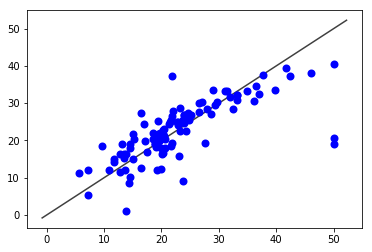

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
2,V2,0.033733,0.364169,6.964869,83.113636,0.008651
4,V4,0.071928,0.324299,6.494733,82.243887,0.019025
6,V6,0.112677,0.308958,6.238957,75.423558,0.100375
1,V1,0.134206,0.313026,6.191592,74.915748,0.106432
10,V10,0.148274,0.296084,6.126351,74.370931,0.112931
7,V7,0.151131,0.305616,6.259317,71.954114,0.141758
11,V11,0.160729,0.304580,6.425360,77.189866,0.079307
9,V9,0.191412,0.300425,6.184804,71.887984,0.142546
8,V8,0.238282,0.299234,5.951999,65.953953,0.213325
5,V5,0.240768,0.293659,6.194581,73.014689,0.129107


In [21]:
result = predict(['V3', 'V12', 'V13', 'V5', 'V8'])
comparativo = comparativo.append(result, ignore_index=True)
comparativo.sort_values(by=['score'])

Ainda não tão bom quanto com todas, mas um pouco melhor

# Todas menos V2

Vamos ver como fica o resultado retirando a feature com pior score (V2)

Features:  V1 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13
Score (R2) encontrada nos dados de treino: 0.7562
Coeficientes: ['0.0425', '4.4400', '-1.2676', '-0.0133', '0.0090', '-0.0972', '0.0840', '-15.5984', '0.0049', '0.2949', '-0.9549', '-0.5359']
Erro quadrático médio: 30.0595602518
Erro absoluto médio: 3.50646703565
Erro relativo médio: 0.167536249919
Variancia: 0.641460503434


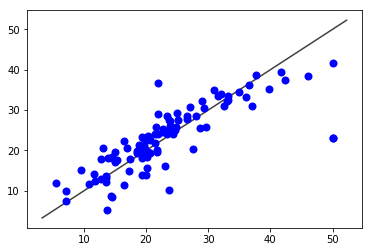

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
2,V2,0.033733,0.364169,6.964869,83.113636,0.008651
4,V4,0.071928,0.324299,6.494733,82.243887,0.019025
6,V6,0.112677,0.308958,6.238957,75.423558,0.100375
1,V1,0.134206,0.313026,6.191592,74.915748,0.106432
10,V10,0.148274,0.296084,6.126351,74.370931,0.112931
7,V7,0.151131,0.305616,6.259317,71.954114,0.141758
11,V11,0.160729,0.304580,6.425360,77.189866,0.079307
9,V9,0.191412,0.300425,6.184804,71.887984,0.142546
8,V8,0.238282,0.299234,5.951999,65.953953,0.213325
5,V5,0.240768,0.293659,6.194581,73.014689,0.129107


In [22]:
result = predict(['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13'])
comparativo = comparativo.append(result, ignore_index=True)
comparativo.sort_values(by=['score'])

Ainda não temos um score que supere o com todas as features porém, o erro relativo diminiu ao retirar o V2

# V2 V3 V4 V9

Agora, a partir dos melhores resultados dos coeficientes da regressão com todas as features, decidimos tentar com o V2 V3 V4 e V9

Features:  V2 V3 V4 V9
Score (R2) encontrada nos dados de treino: 0.6013
Coeficientes: ['5.5116', '8.2814', '-0.5487', '-28.6829']
Erro quadrático médio: 49.8472079991
Erro absoluto médio: 4.39558737214
Erro relativo médio: 0.235100434274
Variancia: 0.405440641463


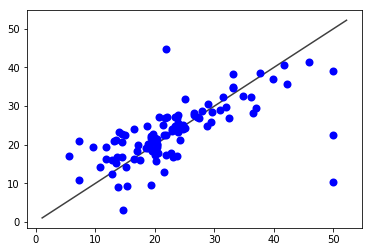

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
2,V2,0.033733,0.364169,6.964869,83.113636,0.008651
4,V4,0.071928,0.324299,6.494733,82.243887,0.019025
6,V6,0.112677,0.308958,6.238957,75.423558,0.100375
1,V1,0.134206,0.313026,6.191592,74.915748,0.106432
10,V10,0.148274,0.296084,6.126351,74.370931,0.112931
7,V7,0.151131,0.305616,6.259317,71.954114,0.141758
11,V11,0.160729,0.304580,6.425360,77.189866,0.079307
9,V9,0.191412,0.300425,6.184804,71.887984,0.142546
8,V8,0.238282,0.299234,5.951999,65.953953,0.213325
5,V5,0.240768,0.293659,6.194581,73.014689,0.129107


In [23]:
result = predict(['V2', 'V3', 'V4', 'V9'])
comparativo = comparativo.append(result, ignore_index=True)
comparativo.sort_values(by=['score'])

Foi pior do que as outras combinações mas ainda é melhor do que as features isoladas

# Conclusões

In [25]:
comparativo.sort_values(by=['score'])

,features,score,erro relativo,erro absoluto,erro quadratico,variancia
2,V2,0.033733,0.364169,6.964869,83.113636,0.008651
4,V4,0.071928,0.324299,6.494733,82.243887,0.019025
6,V6,0.112677,0.308958,6.238957,75.423558,0.100375
1,V1,0.134206,0.313026,6.191592,74.915748,0.106432
10,V10,0.148274,0.296084,6.126351,74.370931,0.112931
7,V7,0.151131,0.305616,6.259317,71.954114,0.141758
11,V11,0.160729,0.304580,6.425360,77.189866,0.079307
9,V9,0.191412,0.300425,6.184804,71.887984,0.142546
8,V8,0.238282,0.299234,5.951999,65.953953,0.213325
5,V5,0.240768,0.293659,6.194581,73.014689,0.129107


Nenhuma feature sozinha tem o score melhor do que combinações.
O algoritmo foi capaz de encontrar uma combinação de features melhor do que as que conseguimos escolher manualmente a partir da nossa analise dos dados. 
Portanto, o score com todas as features foi o melhor o encontrado porém, se o objetivo é reduzir o erro relativo médio, verificamos que retirar o V2 é uma boa escolha.